# Read colloidal ice from simulation or experimental data

This notebook explores options for reading simulations and experiments, and using them to define a `colloidal_ice` object.

In [1]:
# This only adds the package to the path.
import os
import sys 
sys.path.insert(0, '../../../')

import icenumerics as ice

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ureg = ice.ureg

In [3]:
sp = ice.spins()
sp.create_lattice("square",[10,10],lattice_constant=30*ureg.um, border="closed spin")

In [4]:
particle = ice.particle(radius = 5.15*ureg.um,
             susceptibility = 0.0576,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap = ice.trap(trap_sep = 10*ureg.um,
               height = 10*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

col = ice.colloidal_ice(sp, particle, trap, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(30*ureg.um)

In [5]:
world = ice.world(
    field = 20*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

In [6]:
%%time

col.simulate(world,
             name = "test",
             include_timestamp = False,
             targetdir = r".",
             framerate = 100*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = 60*ureg.s,
             output = ["x","y","z"])

CPU times: user 55.6 s, sys: 2.16 s, total: 57.8 s
Wall time: 1min 22s


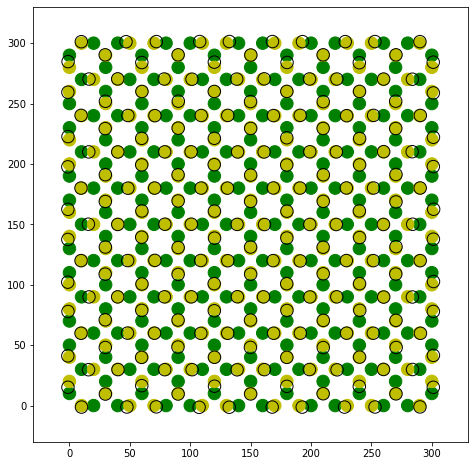

In [7]:
f, (ax2) = plt.subplots(1,1,figsize = (8,8))
col.display(ax2)

### What happens when a colloid is exactly at zero?

It is possible, due to rounding errors, to find a colloid exactly in the center of the trap. In order not to lose the direction, the program will preserve the last direction.

In [8]:
col.trj.loc[(5999,220),["x","y"]] = col.trj.loc[(5999,440),["x","y"]]

In [9]:
col = col.set_state_from_frame(-1)

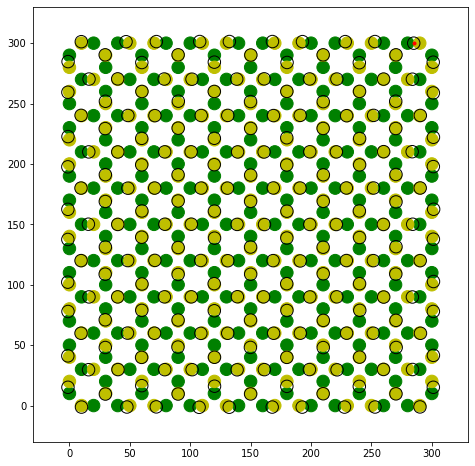

In [10]:
f, (ax2) = plt.subplots(1,1,figsize = (8,8))
col.display(ax2)
plt.plot(col.trj.loc[(5999,220),"x"],col.trj.loc[(5999,220),"y"],'.',color="red")